In [1]:
import time
import random

def generate_transaction():
    return {
        "user_id": f"user{random.randint(1, 100)}",
        "amount": round(random.uniform(10.0, 500.0), 2),
        "transaction_time": time.strftime("%Y-%m-%d %H:%M:%S")
    }

def process_transactions_serial(num_transactions=10000):
    # Actual processing with simulated delay
    start_time = time.time()
    transactions = [generate_transaction() for _ in range(num_transactions)]
    total_amount = 0
    for transaction in transactions:
        total_amount += transaction["amount"]
        time.sleep(0.001)  # sleep 1 ms for simulation of processing delay

    end_time = time.time()
    processing_time_serial = end_time - start_time
    efficiency = num_transactions / processing_time_serial  # Transactions per second

    print(f"Total amount processed: ${total_amount:.2f}")
    print(f"Serial Processing Time: {processing_time_serial:.2f} seconds")
    print(f"Efficiency: {efficiency:.2f} transactions per second")

    return processing_time_serial, efficiency

serial_time, serial_efficiency = process_transactions_serial()


Total amount processed: $2546523.10
Serial Processing Time: 12.64 seconds
Efficiency: 791.25 transactions per second


In [2]:
pip install pyspark


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:

from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum as _sum
import time

def process_transactions_parallel(num_transactions=10000):
    # Spark session setup
    spark = SparkSession.builder \
        .appName("Parallel Processing") \
        .master("local[*]") \
        .getOrCreate()

    data = [{"user_id": f"user{random.randint(1, 100)}", "amount": round(random.uniform(10.0, 500.0), 2)} for _ in range(num_transactions)]
    df = spark.createDataFrame(data)

    # Begin timing the parallel process
    start_time = time.time()
    result = df.groupBy("user_id").agg(_sum("amount").alias("total_amount"))
    result.collect()  # Trigger computation
    end_time = time.time()

    # End of Spark session
    spark.stop()

    processing_time_parallel = end_time - start_time
    efficiency = num_transactions / processing_time_parallel  # Transactions per second

    print(f"Parallel Processing Time with Spark: {processing_time_parallel:.2f} seconds")
    print(f"Efficiency: {efficiency:.2f} transactions per second")

    return processing_time_parallel, efficiency

parallel_time, parallel_efficiency = process_transactions_parallel()


24/05/07 14:18:18 WARN Utils: Your hostname, Charishs-Laptop.local resolves to a loopback address: 127.0.0.1; using 134.88.139.141 instead (on interface en0)
24/05/07 14:18:18 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/07 14:18:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Parallel Processing Time with Spark: 1.53 seconds
Efficiency: 6552.57 transactions per second


In [4]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


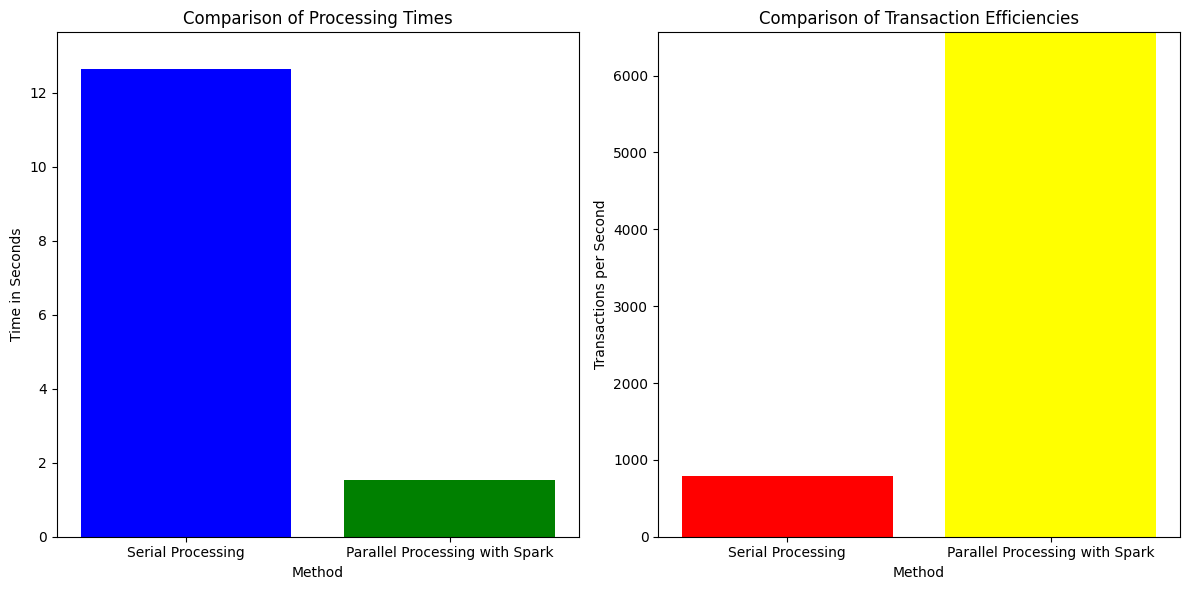

In [5]:
import matplotlib.pyplot as plt

# Data setup
methods = ['Serial Processing', 'Parallel Processing with Spark']
times = [serial_time, parallel_time]
efficiencies = [serial_efficiency, parallel_efficiency]

# Plotting the processing times
plt.figure(figsize=(12, 6))

# Subplot 1: Processing Times
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.bar(methods, times, color=['blue', 'green'])
plt.title('Comparison of Processing Times')
plt.xlabel('Method')
plt.ylabel('Time in Seconds')
plt.ylim(0, max(times) + 1)  # To better show the comparison

# Subplot 2: Efficiencies
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.bar(methods, efficiencies, color=['red', 'yellow'])
plt.title('Comparison of Transaction Efficiencies')
plt.xlabel('Method')
plt.ylabel('Transactions per Second')
plt.ylim(0, max(efficiencies) + 10)  # Adjust as necessary to better show the comparison

plt.tight_layout()
plt.show()


In [7]:
import time
import random

def generate_transaction():
    return {
        "user_id": f"user{random.randint(1, 100)}",
        "amount": round(random.uniform(10.0, 500.0), 2),
        "transaction_time": time.strftime("%Y-%m-%d %H:%M:%S")
    }

def process_transactions_serial(num_transactions):
    start_time = time.time()
    transactions = [generate_transaction() for _ in range(num_transactions)]
    total_amount = 0
    for transaction in transactions:
        total_amount += transaction["amount"]
        time.sleep(0.001)  # sleep 1 ms for simulation of processing delay

    end_time = time.time()
    processing_time = end_time - start_time
    efficiency = num_transactions / processing_time  # Transactions per second

    print(f"Processed {num_transactions} transactions")
    print(f"Total amount processed: ${total_amount:.2f}")
    print(f"Processing Time: {processing_time:.2f} seconds")
    print(f"Efficiency: {efficiency:.2f} transactions per second")

    return processing_time, efficiency

# Test different data sizes
data_sizes = [1000, 5000, 10000, 20000, 50000]
results = {size: process_transactions_serial(size) for size in data_sizes}


Processed 1000 transactions
Total amount processed: $258384.42
Processing Time: 1.25 seconds
Efficiency: 798.26 transactions per second
Processed 5000 transactions
Total amount processed: $1258023.15
Processing Time: 6.30 seconds
Efficiency: 794.07 transactions per second
Processed 10000 transactions
Total amount processed: $2539216.23
Processing Time: 12.59 seconds
Efficiency: 794.29 transactions per second
Processed 20000 transactions
Total amount processed: $5082161.10
Processing Time: 25.36 seconds
Efficiency: 788.53 transactions per second
Processed 50000 transactions
Total amount processed: $12698715.80
Processing Time: 63.20 seconds
Efficiency: 791.15 transactions per second


In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum as _sum
import time
import random

def process_transactions_parallel(num_transactions):
    # Spark session setup
    spark = SparkSession.builder \
        .appName("Parallel Processing") \
        .master("local[*]") \
        .getOrCreate()

    # Generate data with variable sizes
    data = [{"user_id": f"user{random.randint(1, 100)}", "amount": round(random.uniform(10.0, 500.0), 2)} for _ in range(num_transactions)]
    df = spark.createDataFrame(data)

    # Start timing the parallel processing
    start_time = time.time()
    result = df.groupBy("user_id").agg(_sum("amount").alias("total_amount"))
    result.collect()  # Trigger computation
    end_time = time.time()

    # End Spark session
    spark.stop()

    processing_time_parallel = end_time - start_time
    efficiency = num_transactions / processing_time_parallel  # Transactions per second

    print(f"Processed {num_transactions} transactions")
    print(f"Parallel Processing Time: {processing_time_parallel:.2f} seconds")
    print(f"Efficiency: {efficiency:.2f} transactions per second")

    return processing_time_parallel, efficiency

# Test different data sizes
data_sizes = [1000, 5000, 10000, 20000, 50000]
results = {size: process_transactions_parallel(size) for size in data_sizes}


Processed 1000 transactions
Parallel Processing Time: 0.64 seconds
Efficiency: 1572.78 transactions per second
Processed 5000 transactions
Parallel Processing Time: 0.61 seconds
Efficiency: 8181.69 transactions per second
Processed 10000 transactions
Parallel Processing Time: 0.56 seconds
Efficiency: 17976.65 transactions per second
Processed 20000 transactions
Parallel Processing Time: 0.59 seconds
Efficiency: 34091.48 transactions per second
Processed 50000 transactions
Parallel Processing Time: 0.67 seconds
Efficiency: 74587.42 transactions per second


In [9]:
import time
import random
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum as _sum
import matplotlib.pyplot as plt

def generate_transaction():
    return {
        "user_id": f"user{random.randint(1, 100)}",
        "amount": round(random.uniform(10.0, 500.0), 2),
        "transaction_time": time.strftime("%Y-%m-%d %H:%M:%S")
    }

def process_transactions_serial(num_transactions):
    start_time = time.time()
    transactions = [generate_transaction() for _ in range(num_transactions)]
    total_amount = 0
    for transaction in transactions:
        total_amount += transaction["amount"]
        time.sleep(0.001)  # sleep 1 ms for simulation of processing delay

    end_time = time.time()
    processing_time = end_time - start_time
    efficiency = num_transactions / processing_time  # Transactions per second

    return processing_time, efficiency

def process_transactions_parallel(num_transactions):
    spark = SparkSession.builder \
        .appName("Parallel Processing") \
        .master("local[*]") \
        .getOrCreate()

    data = [{"user_id": f"user{random.randint(1, 100)}", "amount": round(random.uniform(10.0, 500.0), 2)} for _ in range(num_transactions)]
    df = spark.createDataFrame(data)

    start_time = time.time()
    result = df.groupBy("user_id").agg(_sum("amount").alias("total_amount"))
    result.collect()  # Trigger computation
    processing_time = time.time() - start_time
    efficiency = num_transactions / processing_time  # Transactions per second

    spark.stop()

    return processing_time, efficiency

# Test different data sizes
data_sizes = [1000, 5000, 10000, 20000, 50000]

# Process transactions serially
serial_results = {size: process_transactions_serial(size) for size in data_sizes}

# Process transactions in parallel
parallel_results = {size: process_transactions_parallel(size) for size in data_sizes}

# Extract processing times and efficiencies from the results
serial_processing_times = [serial_results[size][0] for size in data_sizes]
parallel_processing_times = [parallel_results[size][0] for size in data_sizes]
serial_efficiencies = [serial_results[size][1] for size in data_sizes]
parallel_efficiencies = [parallel_results[size][1] for size in data_sizes]

# Plotting line plots
plt.figure(figsize=(12, 6))

# Line plot for processing times
plt.subplot(1, 2, 1)
plt.plot(data_sizes, serial_processing_times, marker='o', label='Serial Processing')
plt.plot(data_sizes, parallel_processing_times, marker='o', label='Parallel Processing')
plt.xlabel('Data Size')
plt.ylabel('Processing Time (seconds)')
plt.title('Processing Time Comparison')
plt.legend()
plt.grid(True)

# Line plot for efficiencies
plt.subplot(1, 2, 2)
plt.plot(data_sizes, serial_efficiencies, marker='o', label='Serial Processing')
plt.plot(data_sizes, parallel_efficiencies, marker='o', label='Parallel Processing')
plt.xlabel('Data Size')
plt.ylabel('Efficiency (transactions per second)')
plt.title('Efficiency Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import time
import random

def generate_transaction():
    return {
        "user_id": f"user{random.randint(1, 100)}",
        "amount": round(random.uniform(10.0, 500.0), 2),
        "transaction_time": time.strftime("%Y-%m-%d %H:%M:%S")
    }

def process_chunk(num_transactions):
    transactions = [generate_transaction() for _ in range(num_transactions)]
    total_amount = sum(transaction['amount'] for transaction in transactions)
    # Simulate processing time per transaction
    time.sleep(num_transactions * 0.001)  # This simulates the 1ms per transaction processing delay
    return total_amount

def process_transactions_serial(num_transactions, num_cores):
    chunk_size = num_transactions // num_cores
    start_time = time.time()
    
    # Simulate each core processing a part of the workload sequentially
    for _ in range(num_cores):
        process_chunk(chunk_size)
    
    end_time = time.time()
    processing_time = end_time - start_time
    efficiency = num_transactions / processing_time  # Transactions per second

    print(f"Simulated processing with {num_cores} cores:")
    print(f"Total processing time: {processing_time:.2f} seconds")
    print(f"Efficiency: {efficiency:.2f} transactions per second")

    return processing_time, efficiency

# Example usage
num_transactions = 10000
for num_cores in [1, 2, 4, 8]:
    process_transactions_serial(num_transactions, num_cores)


Simulated processing with 1 cores:
Total processing time: 10.03 seconds
Efficiency: 997.41 transactions per second
Simulated processing with 2 cores:
Total processing time: 10.05 seconds
Efficiency: 995.07 transactions per second
Simulated processing with 4 cores:
Total processing time: 10.05 seconds
Efficiency: 994.54 transactions per second
Simulated processing with 8 cores:
Total processing time: 10.06 seconds
Efficiency: 993.77 transactions per second


In [ ]:

def process_transactions_parallel(num_transactions, num_cores):
    # Sparkx session setup with specified number of cores
    spark = SparkSession.builder \
    .appName("Parallel Processing") \
    .master(f"local[{num_cores}]") \
    .getOrCreate()

    # Generate data
    data = [{"user_id": f"user{random.randint(1, 100)}", 
             "amount": round(random.uniform(10.0, 500.0), 2)} 
            for _ in range(num_transactions)]
    df = spark.createDataFrame(data)

    # Begin timing the parallel process
    start_time = time.time()
    result = df.groupBy("user_id").agg(_sum("amount").alias("total_amount"))
    result.collect()  # Trigger computation
    end_time = time.time()

    # End of Spark session
    spark.stop()

    processing_time_parallel = end_time - start_time
    efficiency = num_transactions / processing_time_parallel  # Transactions per second

    print(f"Parallel Processing with {num_cores} cores:")
    print(f"Processing Time: {processing_time_parallel:.2f} seconds")
    print(f"Efficiency: {efficiency:.2f} transactions per second")

    return processing_time_parallel, efficiency

# Test the function with different numbers of cores
num_transactions = 10000
core_configs = [1, 2, 4, 8]
results = {}
for cores in core_configs:
    results[cores] = process_transactions_parallel(num_transactions, cores)
    print(f"Results with {cores} cores: Time - {results[cores][0]:.2f}s, Efficiency - {results[cores][1]:.2f} txn/s")


Parallel Processing with 1 cores:
Processing Time: 0.47 seconds
Efficiency: 21054.76 transactions per second
Results with 1 cores: Time - 0.47s, Efficiency - 21054.76 txn/s
Parallel Processing with 2 cores:
Processing Time: 0.49 seconds
Efficiency: 20611.63 transactions per second
Results with 2 cores: Time - 0.49s, Efficiency - 20611.63 txn/s
Parallel Processing with 4 cores:
Processing Time: 0.49 seconds
Efficiency: 20307.65 transactions per second
Results with 4 cores: Time - 0.49s, Efficiency - 20307.65 txn/s
Parallel Processing with 8 cores:
Processing Time: 0.60 seconds
Efficiency: 16784.83 transactions per second
Results with 8 cores: Time - 0.60s, Efficiency - 16784.83 txn/s


Simulated processing with 1 cores:
Total processing time: 10.03 seconds
Efficiency: 997.08 transactions per second
Parallel Processing with 1 cores:
Processing Time: 0.43 seconds
Efficiency: 22990.25 transactions per second
Simulated processing with 2 cores:
Total processing time: 10.04 seconds
Efficiency: 995.72 transactions per second
Parallel Processing with 2 cores:
Processing Time: 0.47 seconds
Efficiency: 21382.14 transactions per second
Simulated processing with 4 cores:
Total processing time: 10.05 seconds
Efficiency: 994.95 transactions per second
Parallel Processing with 4 cores:
Processing Time: 0.53 seconds
Efficiency: 19037.25 transactions per second
Simulated processing with 8 cores:
Total processing time: 10.06 seconds
Efficiency: 994.10 transactions per second
Parallel Processing with 8 cores:
Processing Time: 0.65 seconds
Efficiency: 15322.71 transactions per second


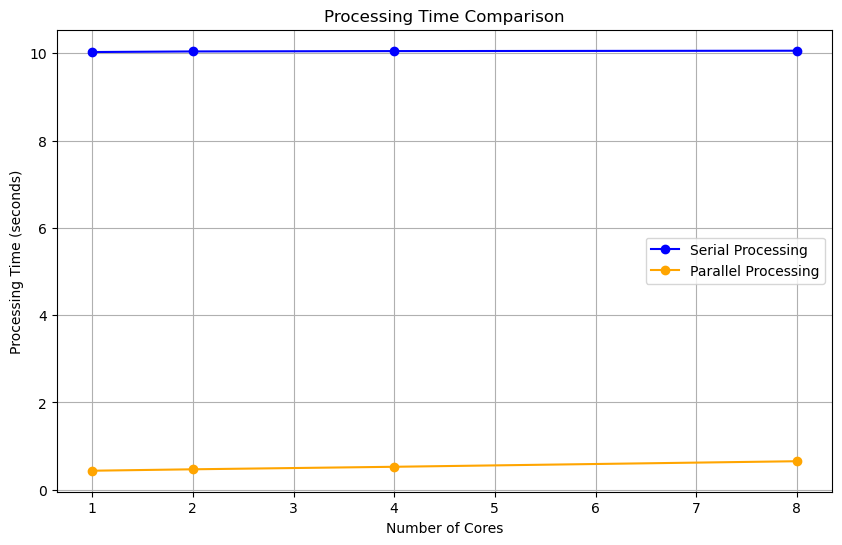

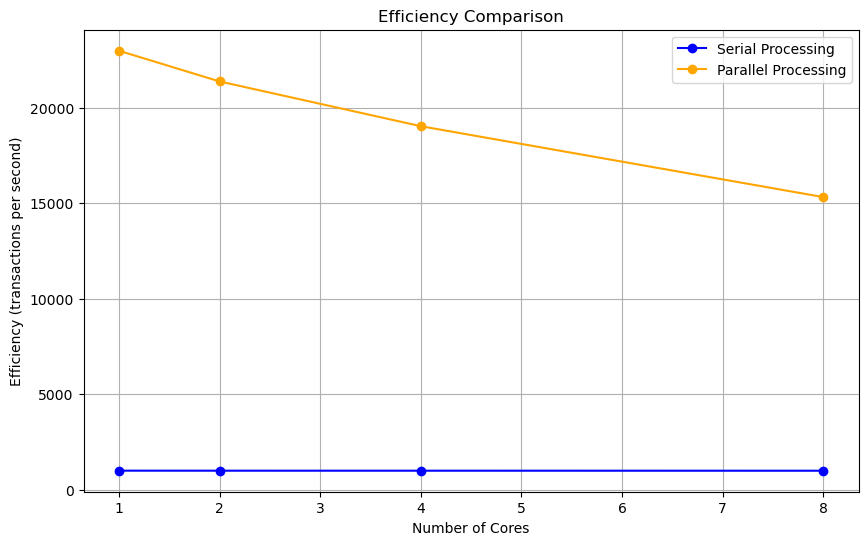

In [ ]:
import matplotlib.pyplot as plt

# Test the function with different numbers of cores
num_transactions = 10000
core_configs = [1, 2, 4, 8]

# Lists to store results
serial_times = []
parallel_times = []
serial_efficiencies = []
parallel_efficiencies = []

# Process transactions for serial and parallel approaches
for cores in core_configs:
    # Serial processing
    serial_processing_time, serial_efficiency = process_transactions_serial(num_transactions, cores)
    serial_times.append(serial_processing_time)
    serial_efficiencies.append(serial_efficiency)

    # Parallel processing
    parallel_processing_time, parallel_efficiency = process_transactions_parallel(num_transactions, cores)
    parallel_times.append(parallel_processing_time)
    parallel_efficiencies.append(parallel_efficiency)

# Create line plots for processing time comparison
plt.figure(figsize=(10, 6))
plt.plot(core_configs, serial_times, marker='o', color='blue', label='Serial Processing')
plt.plot(core_configs, parallel_times, marker='o', color='orange', label='Parallel Processing')
plt.xlabel('Number of Cores')
plt.ylabel('Processing Time (seconds)')
plt.title('Processing Time Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Create line plots for efficiency comparison
plt.figure(figsize=(10, 6))
plt.plot(core_configs, serial_efficiencies, marker='o', color='blue', label='Serial Processing')
plt.plot(core_configs, parallel_efficiencies, marker='o', color='orange', label='Parallel Processing')
plt.xlabel('Number of Cores')
plt.ylabel('Efficiency (transactions per second)')
plt.title('Efficiency Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import time
import random

def generate_transaction():
    return {
        "user_id": f"user{random.randint(1, 100)}",
        "amount": round(random.uniform(10.0, 500.0), 2),
        "transaction_time": time.strftime("%Y-%m-%d %H:%M:%S")
    }

def process_chunk(num_transactions):
    transactions = [generate_transaction() for _ in range(num_transactions)]
    total_amount = sum(transaction['amount'] for transaction in transactions)
    # Simulate processing time per transaction
    time.sleep(num_transactions * 0.001)  # This simulates the 1ms per transaction processing delay
    return total_amount

def process_transactions_serial(num_transactions, num_cores):
    chunk_size = num_transactions // num_cores
    start_time = time.time()
    
    # Simulate each core processing a part of the workload sequentially
    for _ in range(num_cores):
        process_chunk(chunk_size)
    
    end_time = time.time()
    processing_time = end_time - start_time
    efficiency = num_transactions / processing_time  # Transactions per second

    print(f"Simulated processing with {num_cores} cores and {num_transactions} transactions:")
    print(f"Total processing time: {processing_time:.2f} seconds")
    print(f"Efficiency: {efficiency:.2f} transactions per second")

    return processing_time, efficiency

# Example usage
data_sizes = [1000, 5000,10000, 20000, 50000]  # Different data sizes
for num_cores in [1, 2, 4, 8]:  # Different numbers of cores
    for size in data_sizes:
        process_transactions_serial(size, num_cores)


Simulated processing with 1 cores and 1000 transactions:
Total processing time: 1.01 seconds
Efficiency: 992.12 transactions per second
Simulated processing with 1 cores and 5000 transactions:
Total processing time: 5.02 seconds
Efficiency: 995.20 transactions per second
Simulated processing with 1 cores and 10000 transactions:
Total processing time: 10.04 seconds
Efficiency: 996.23 transactions per second
Simulated processing with 1 cores and 20000 transactions:
Total processing time: 20.05 seconds
Efficiency: 997.28 transactions per second
Simulated processing with 1 cores and 50000 transactions:
Total processing time: 77.79 seconds
Efficiency: 642.74 transactions per second
Simulated processing with 2 cores and 1000 transactions:
Total processing time: 1.01 seconds
Efficiency: 989.65 transactions per second
Simulated processing with 2 cores and 5000 transactions:
Total processing time: 5.03 seconds
Efficiency: 994.55 transactions per second
Simulated processing with 2 cores and 1000

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum as _sum
import time
import random

def process_transactions_parallel(num_transactions, num_cores):
    # Spark session setup with specified number of cores
    spark = SparkSession.builder \
        .appName("Parallel Processing") \
        .master(f"local[{num_cores}]") \
        .getOrCreate()

    # Generate data
    data = [{"user_id": f"user{random.randint(1, 100)}",
             "amount": round(random.uniform(10.0, 500.0), 2)}
            for _ in range(num_transactions)]
    df = spark.createDataFrame(data)

    # Begin timing the parallel process
    start_time = time.time()
    result = df.groupBy("user_id").agg(_sum("amount").alias("total_amount"))
    result.collect()  # Trigger computation
    end_time = time.time()

    # End of Spark session
    spark.stop()

    processing_time_parallel = end_time - start_time
    efficiency = num_transactions / processing_time_parallel  # Transactions per second

    print(f"Parallel Processing with {num_cores} cores and {num_transactions} transactions:")
    print(f"Processing Time: {processing_time_parallel:.2f} seconds")
    print(f"Efficiency: {efficiency:.2f} transactions per second")

    return processing_time_parallel, efficiency

# Test the function with different data sizes
data_sizes = [1000, 5000, 10000, 20000, 50000]  # Different data sizes
for num_cores in [1, 2, 4, 8]:
    for size in data_sizes:
        process_transactions_parallel(size, num_cores)


Parallel Processing with 1 cores and 1000 transactions:
Processing Time: 0.64 seconds
Efficiency: 1572.34 transactions per second
Parallel Processing with 1 cores and 5000 transactions:
Processing Time: 0.51 seconds
Efficiency: 9891.00 transactions per second
Parallel Processing with 1 cores and 10000 transactions:
Processing Time: 0.47 seconds
Efficiency: 21315.14 transactions per second
Parallel Processing with 1 cores and 20000 transactions:
Processing Time: 0.51 seconds
Efficiency: 39366.74 transactions per second
Parallel Processing with 1 cores and 50000 transactions:
Processing Time: 0.52 seconds
Efficiency: 96895.46 transactions per second
Parallel Processing with 2 cores and 1000 transactions:
Processing Time: 0.43 seconds
Efficiency: 2315.81 transactions per second
Parallel Processing with 2 cores and 5000 transactions:
Processing Time: 0.45 seconds
Efficiency: 11105.55 transactions per second
Parallel Processing with 2 cores and 10000 transactions:
Processing Time: 0.51 seco

Parallel Processing with 8 cores and 10000 transactions:
Processing Time: 0.97 seconds
Efficiency: 10291.61 transactions per second


Parallel Processing with 8 cores and 20000 transactions:
Processing Time: 0.71 seconds
Efficiency: 28020.79 transactions per second


Parallel Processing with 8 cores and 50000 transactions:
Processing Time: 0.66 seconds
Efficiency: 76270.33 transactions per second


Simulated processing with 1 cores and 1000 transactions:
Total processing time: 1.01 seconds
Efficiency: 992.26 transactions per second
Parallel Processing with 8 cores and 1000 transactions:
Processing Time: 0.56 seconds
Efficiency: 1789.99 transactions per second
Simulated processing with 1 cores and 5000 transactions:
Total processing time: 5.03 seconds
Efficiency: 994.51 transactions per second
Parallel Processing with 8 cores and 5000 transactions:
Processing Time: 0.57 seconds
Efficiency: 8828.20 transactions per second
Simulated processing with 1 cores and 10000 transactions:
Total processing time: 10.04 seconds
Efficiency: 996.36 transactions per second


Parallel Processing with 8 cores and 10000 transactions:
Processing Time: 0.66 seconds
Efficiency: 15226.03 transactions per second
Simulated processing with 1 cores and 20000 transactions:
Total processing time: 20.05 seconds
Efficiency: 997.44 transactions per second


Parallel Processing with 8 cores and 20000 transactions:
Processing Time: 0.79 seconds
Efficiency: 25378.33 transactions per second
Simulated processing with 1 cores and 50000 transactions:
Total processing time: 50.11 seconds
Efficiency: 997.89 transactions per second
Parallel Processing with 8 cores and 50000 transactions:
Processing Time: 0.69 seconds
Efficiency: 72488.98 transactions per second


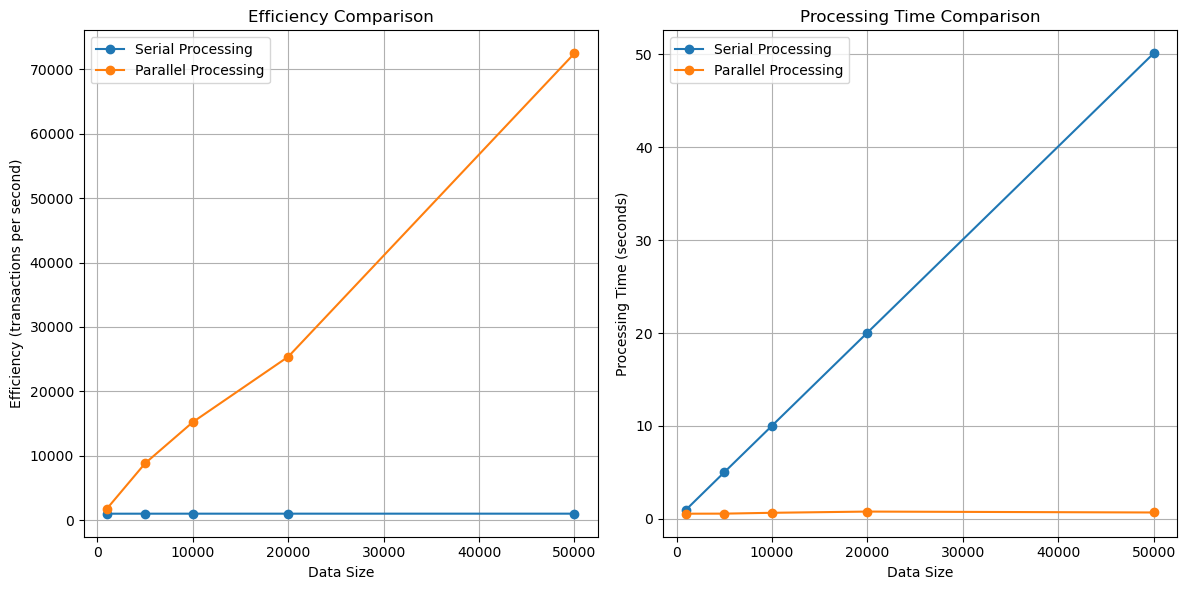

In [ ]:
import matplotlib.pyplot as plt

# Test the function with different data sizes
data_sizes = [1000, 5000, 10000, 20000, 50000]

# Lists to store results
serial_processing_times = []
parallel_processing_times = []
serial_efficiencies = []
parallel_efficiencies = []

# Process transactions for serial and parallel approaches
for size in data_sizes:
    # Serial processing
    serial_processing_time, serial_efficiency = process_transactions_serial(size, 1)
    serial_processing_times.append(serial_processing_time)
    serial_efficiencies.append(serial_efficiency)

    # Parallel processing
    parallel_processing_time, parallel_efficiency = process_transactions_parallel(size, 8)
    parallel_processing_times.append(parallel_processing_time)
    parallel_efficiencies.append(parallel_efficiency)

# Create plots
plt.figure(figsize=(12, 6))

# Efficiency comparison (line plot)
plt.subplot(1, 2, 1)
plt.plot(data_sizes, serial_efficiencies, marker='o', label='Serial Processing')
plt.plot(data_sizes, parallel_efficiencies, marker='o', label='Parallel Processing')
plt.xlabel('Data Size')
plt.ylabel('Efficiency (transactions per second)')
plt.title('Efficiency Comparison')
plt.legend()
plt.grid(True)

# Processing time comparison (line plot)
plt.subplot(1, 2, 2)
plt.plot(data_sizes, serial_processing_times, marker='o', label='Serial Processing')
plt.plot(data_sizes, parallel_processing_times, marker='o', label='Parallel Processing')
plt.xlabel('Data Size')
plt.ylabel('Processing Time (seconds)')
plt.title('Processing Time Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import time
import random
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum as _sum

def generate_transaction():
    return {
        "user_id": f"user{random.randint(1, 100)}",
        "amount": round(random.uniform(10.0, 500.0), 2),
        "transaction_time": time.strftime("%Y-%m-%d %H:%M:%S")
    }

def process_transactions_serial(num_transactions=10000):
    start_time = time.time()
    transactions = [generate_transaction() for _ in range(num_transactions)]
    total_amount = 0
    for transaction in transactions:
        total_amount += transaction["amount"]
        time.sleep(0.001)  # simulate processing delay

    end_time = time.time()
    processing_time_serial = end_time - start_time
    efficiency = num_transactions / processing_time_serial  # Transactions per second

    print(f"Total amount processed: ${total_amount:.2f}")
    print(f"Serial Processing Time: {processing_time_serial:.2f} seconds")
    print(f"Efficiency: {efficiency:.2f} transactions per second")

    return processing_time_serial, efficiency

def process_transactions_parallel(num_transactions=10000):
    spark = SparkSession.builder \
        .appName("Parallel Processing") \
        .master("local[*]") \
        .getOrCreate()

    data = [{"user_id": f"user{random.randint(1, 100)}", "amount": round(random.uniform(10.0, 500.0), 2)} for _ in range(num_transactions)]
    df = spark.createDataFrame(data)

    start_time = time.time()
    result = df.groupBy("user_id").agg(_sum("amount").alias("total_amount"))
    result.collect()  # Trigger computation
    end_time = time.time()

    spark.stop()

    processing_time_parallel = end_time - start_time
    efficiency = num_transactions / processing_time_parallel  # Transactions per second

    print(f"Parallel Processing Time with Spark: {processing_time_parallel:.2f} seconds")
    print(f"Efficiency: {efficiency:.2f} transactions per second")

    return processing_time_parallel, efficiency

# Run serial and parallel processing
serial_time, serial_efficiency = process_transactions_serial()
parallel_time, parallel_efficiency = process_transactions_parallel()

# Calculate speedup and efficiency gain
speed_up = serial_time / parallel_time
efficiency_gain = parallel_efficiency / serial_efficiency

print(f"Speedup: {speed_up:.2f}")
print(f"Efficiency Gain: {efficiency_gain:.2f}")


Total amount processed: $2535387.56
Serial Processing Time: 12.59 seconds
Efficiency: 794.43 transactions per second


Parallel Processing Time with Spark: 0.69 seconds
Efficiency: 14417.01 transactions per second
Speedup: 18.15
Efficiency Gain: 18.15


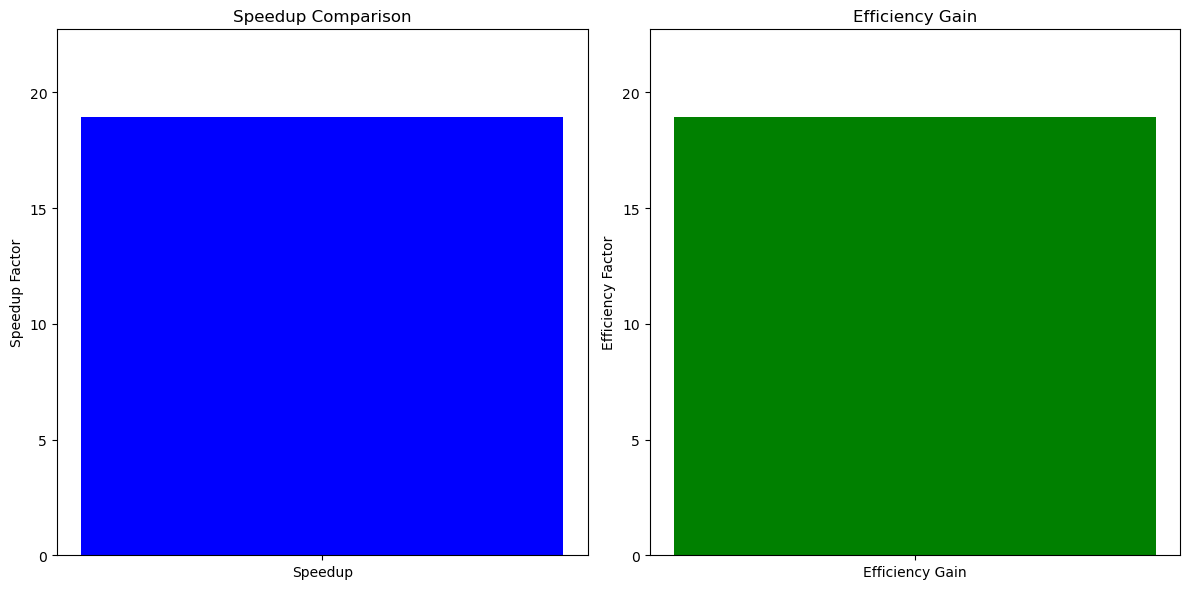

In [ ]:
import time
import random
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum as _sum
import matplotlib.pyplot as plt

def generate_transaction():
    return {
        "user_id": f"user{random.randint(1, 100)}",
        "amount": round(random.uniform(10.0, 500.0), 2),
        "transaction_time": time.strftime("%Y-%m-%d %H:%M:%S")
    }

def process_transactions_serial(num_transactions=10000):
    start_time = time.time()
    transactions = [generate_transaction() for _ in range(num_transactions)]
    total_amount = 0
    for transaction in transactions:
        total_amount += transaction["amount"]
        time.sleep(0.001)  # simulate processing delay

    end_time = time.time()
    processing_time_serial = end_time - start_time
    efficiency = num_transactions / processing_time_serial  # Transactions per second

    return total_amount, processing_time_serial, efficiency

def process_transactions_parallel(num_transactions=10000):
    spark = SparkSession.builder \
        .appName("Parallel Processing") \
        .master("local[*]") \
        .getOrCreate()

    data = [{"user_id": f"user{random.randint(1, 100)}", "amount": round(random.uniform(10.0, 500.0), 2)} for _ in range(num_transactions)]
    df = spark.createDataFrame(data)

    start_time = time.time()
    result = df.groupBy("user_id").agg(_sum("amount").alias("total_amount"))
    result.collect()  # Trigger computation
    end_time = time.time()

    spark.stop()

    processing_time_parallel = end_time - start_time
    efficiency = num_transactions / processing_time_parallel  # Transactions per second

    return processing_time_parallel, efficiency

# Run serial and parallel processing
total_amount_serial, serial_time, serial_efficiency = process_transactions_serial()
parallel_time, parallel_efficiency = process_transactions_parallel()

# Calculate speedup and efficiency gain
speed_up = serial_time / parallel_time
efficiency_gain = parallel_efficiency / serial_efficiency

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Speedup plot
ax[0].bar(['Speedup'], [speed_up], color='blue')
ax[0].set_title('Speedup Comparison')
ax[0].set_ylabel('Speedup Factor')
ax[0].set_ylim(0, max(speed_up * 1.2, 1))

# Efficiency gain plot
ax[1].bar(['Efficiency Gain'], [efficiency_gain], color='green')
ax[1].set_title('Efficiency Gain')
ax[1].set_ylabel('Efficiency Factor')
ax[1].set_ylim(0, max(efficiency_gain * 1.2, 1))

# Show plot
plt.tight_layout()
plt.show()
